## Predicting Diabetes

In [ ]:
# Importing Dataset
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Importing the Dataset
df = pd.read_csv('diabetesdataset.csv')

In [3]:
print(df)
df.head(10)

      ID  pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age  \
0      1         6      148        72       35        0  33.6     0.627   50   
1      2         1       85        66       29        0  26.6     0.351   31   
2      3         8      183        64        0        0  23.3     0.672   32   
3      4         1       89        66       23       94  28.1     0.167   21   
4      5         0      137        40       35      168  43.1     2.288   33   
..   ...       ...      ...       ...      ...      ...   ...       ...  ...   
763  764        10      101        76       48      180  32.9     0.171   63   
764  765         2      122        70       27        0  36.8     0.340   27   
765  766         5      121        72       23      112  26.2     0.245   30   
766  767         1      126        60        0        0  30.1     0.349   47   
767  768         1       93        70       31        0  30.4     0.315   23   

    diabetes  
0        pos  
1        

,ID,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,6,148,72,35,0,33.6,0.627,50,pos
1,2,1,85,66,29,0,26.6,0.351,31,neg
2,3,8,183,64,0,0,23.3,0.672,32,pos
3,4,1,89,66,23,94,28.1,0.167,21,neg
4,5,0,137,40,35,168,43.1,2.288,33,pos
5,6,5,116,74,0,0,25.6,0.201,30,neg
6,7,3,78,50,32,88,31.0,0.248,26,pos
7,8,10,115,0,0,0,35.3,0.134,29,neg
8,9,2,197,70,45,543,30.5,0.158,53,pos
9,10,8,125,96,0,0,0.0,0.232,54,pos


In [4]:
df.shape

(768, 10)

In [5]:
diabets_map={"pos":1,"neg":0}

In [6]:
df['diabetes'] = df['diabetes'].map(diabets_map)

In [7]:
df.head()

,ID,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.columns

Index(['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [9]:
df[['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age']]=df[['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age']].replace(0,np.NaN)

In [10]:
df.isnull().sum()

ID            0
pregnant    111
glucose       5
pressure     35
triceps     227
insulin     374
mass         11
pedigree      0
age           0
diabetes      0
dtype: int64

In [11]:
df.fillna(df.mean(),inplace=True)

In [12]:
df.isnull().sum()

ID          0
pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [13]:
feature_columns=['ID', 'pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age']
predicted_values=['diabetes']

In [14]:
X=df[feature_columns].values
Y=df[predicted_values].values

In [25]:
df.dropna(inplace=True)

In [26]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

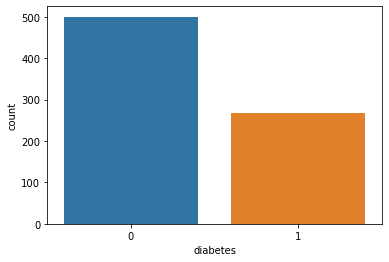

In [27]:
sns.countplot(x='diabetes',data=df)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=10)

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [19]:
logistic_regression.fit(x_train,y_train)

c:\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
y_pred = logistic_regression.predict(x_test)

In [21]:
print(y_pred)
from sklearn.metrics import  confusion_matrix

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0]


In [22]:
confusion_matrix(y_test,y_pred)

array([[121,  23],
       [ 48,  39]], dtype=int64)

In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.6926406926406926